In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!nvidia-smi

In [ ]:
%pip install wandb


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wandb
wandb.login()
#68d141a84e46b2c24e84d088688d602d3308c683

True

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from tqdm.auto import tqdm
import scipy.io

In [ ]:
data = scipy.io.loadmat("/content/drive/MyDrive/cv2023/train_32x32.mat")

In [ ]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
          [ 30,  76,  54, ...,  78, 188, 217],
          [ 38,  59, 110, ..., 101, 191, 212]],
 
         [[ 15,  86,  20, ...,  94, 205, 221],
          [ 23,  73,  52, ...,  82, 203, 222],
          [ 19,  66, 111, ..., 105, 206, 217]],
 
         [[ 15,  77,  25, ..., 114, 220, 226],
          [ 17,  78,  57, ..., 101, 218, 227],
          [ 19,  56, 116, ..., 125, 220, 221]],
 
         ...,
 
         [[ 72,  90,  65, ..., 200, 229, 200],
          [ 65,  78, 144, ..., 201, 231, 199],
          [ 56,  69, 223, ..., 203, 224, 191]],
 
         [[ 82,  88,  78, ..., 192, 229, 193],
          [ 77,  77, 148, ..., 193, 229, 188],
          [ 57,  67, 218, ..., 195, 224, 182]],
 
         [[ 89,  88,  98, ..., 190, 229, 197],
          [ 79,  78, 158, ..., 191, 228, 189],
          [ 59,  66, 220, 

In [ ]:
import pandas as pd

In [ ]:

data['X'].shape

(32, 32, 3, 73257)

In [ ]:
df = data['X']

In [ ]:
df.shape

(32, 32, 3, 73257)

In [ ]:
from matplotlib import pyplot as plt

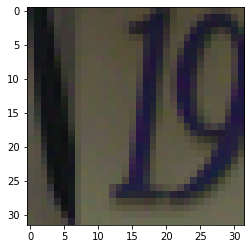

In [ ]:
plt.imshow(df[:,:,:,0])

In [ ]:
#df = np.transpose(df)

In [ ]:
df.shape

(32, 32, 3, 73257)

In [ ]:
# r = df.shape[0]
# s = df.shape[1]*df.shape[2]*df.shape[3]
# data_new = df.reshape(r,s)
# data_new.shape


In [ ]:
#x = data_new.reshape(73257, 3, 32, 32)
#x.shape

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [ ]:
data['y'].shape

(73257, 1)

In [ ]:

data['y']

array([[1],
       [9],
       [2],
       ...,
       [1],
       [6],
       [9]], dtype=uint8)

In [ ]:
data['y'] = np.array([xa[0]-1 for xa in data['y']])

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
train_size = int(0.7*(df.shape[3]));val_size = int(0.2*(df.shape[3])) ;test_size = int(0.1*(df.shape[3]))


In [ ]:
x_train, y_train = df[:,:,:,:train_size],data["y"][:train_size]
x_val, y_val = df[:,:,:,train_size:train_size+val_size],data["y"][train_size:train_size+val_size]
x_test, y_test = df[:,:,:,-test_size:],data["y"][-test_size:]

In [ ]:
x_train.shape


(32, 32, 3, 51279)

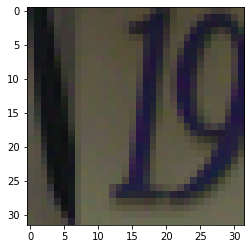

In [ ]:
plt.imshow(x_train[:,:,:,0])

In [ ]:
y_train.shape

(51279,)

In [ ]:
x_val.shape

(32, 32, 3, 14651)

In [ ]:
x_test.shape

(32, 32, 3, 7325)

In [ ]:
x_test[0].shape

(32, 3, 7325)

In [ ]:
x_test[0].shape

(32, 3, 7325)

In [ ]:
# train_data, val_data, test_data = torch.utils.data.random_split(data['X'], [0.7, 0.2, 0.1])


In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

In [ ]:

labels = np.unique(data['y'])

In [ ]:
labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
class CustomDataset():
    def __init__(self, dataset ,label,transform= None):
        self.label = label
        self.dataset = dataset
        self.n_samples = dataset.shape[3]
        self.transform = transform
        self.count=5;
        
    def __len__(self):
        return self.n_samples

    def __getitem__(self, idx):
      if self.transform!=None:
        return self.transform(self.dataset[:,:,:,idx]),self.label[idx]
      return self.dataset[:,:,:,idx],self.label[idx]



In [ ]:
# x_train = x_train.astype('float32')
# y_train = y_train.astype('long')
# x_val = x_val.astype('float32')
# y_val = y_val.astype('long')
# x_test = x_test.astype('float32')
# y_test = y_test.astype('long')

In [ ]:
# x_train = x_train/255
# x_val = x_val/255
# x_test = x_test/255

In [ ]:
custom_transform = transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [ ]:
# custom_transform = transforms.Compose([
#                         transforms.ToTensor()])
dataset1 = CustomDataset(x_train,y_train,custom_transform)
dataset2 = CustomDataset(x_val,y_val,custom_transform)
dataset3 = CustomDataset(x_test,y_test,custom_transform)

In [ ]:
train_dl = DataLoader(dataset = dataset1,batch_size=100, shuffle=True)
val_dl = DataLoader(dataset = dataset2,batch_size=100, shuffle=True)
test_dl = DataLoader(dataset = dataset3,batch_size=100, shuffle=True)

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
data_sample = dataset1.__getitem__(0)[0]
data_sample[0] = data_sample[0]*0.229+0.485
data_sample[1] = data_sample[1]*0.224+0.456
data_sample[2] = data_sample[2]*0.225+0.406

In [ ]:
import math

In [ ]:
num_epochs = 20
total_samples = len(dataset1)
n_iterations = math.ceil(total_samples)

In [ ]:
# for epoch in range(num_epochs):
#     for i, (inputs, labels) in enumerate(train_dl):
#         if (i+1) % 5 == 0:
        #   print(f'Epoch: {epoch+1}/{num_epochs}, Step {i+1}/{n_iterations}| Inputs {inputs.shape} | Labels {labels.shape}')

In [ ]:
val_di = iter(val_dl)
features,labels = next(val_di)
#features,labels = train_data
print(features.shape, labels.shape)

torch.Size([100, 3, 32, 32]) torch.Size([100])


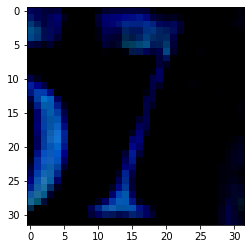

Label: 6


In [ ]:
import matplotlib.pyplot as plt
img = features[0]
label = labels[0]
plt.imshow(img.permute(1,2,0).numpy(), cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
num_epochs = 20
total_samples = len(dataset2)
n_iterations = math.ceil(total_samples)

In [ ]:
test_di = iter(test_dl)
features,labels = next(test_di)
#features,labels = train_data
print(features.shape, labels.shape)

torch.Size([100, 3, 32, 32]) torch.Size([100])


In [ ]:
num_epochs = 20
total_samples = len(dataset3)
n_iterations = math.ceil(total_samples)

In [ ]:
unique, frequency = np.unique(y_train, return_counts = True)

In [ ]:
print("Unique Values:", unique)
print("Frequency Values:",frequency)

Unique Values: [0 1 2 3 4 5 6 7 8 9]
Frequency Values: [9694 7421 5988 5232 4747 4022 3939 3497 3258 3481]


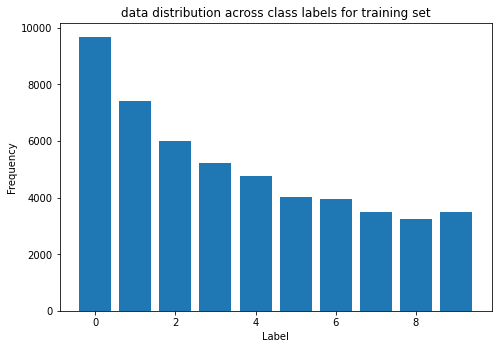

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,frequency)
ax.set_title('data distribution across class labels for training set')
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
unique, frequency = np.unique(y_val, return_counts = True)

In [ ]:
print("Unique Values:", unique)
print("Frequency Values:",frequency)

Unique Values: [0 1 2 3 4 5 6 7 8 9]
Frequency Values: [2786 2133 1641 1513 1412 1131 1103 1028  931  973]


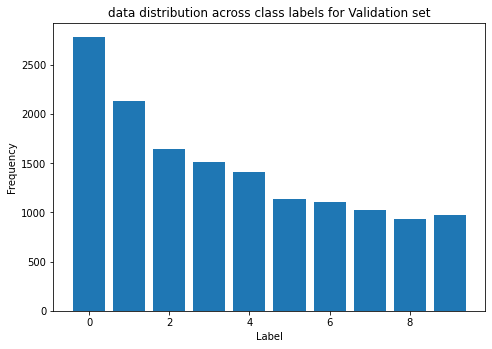

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique,frequency)
ax.set_title('data distribution across class labels for Validation set')
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
#1.2

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
num_epochs = 10
batch_size = 30
learning_rate = 0.001

In [ ]:

# transform = transforms.Compose(
#     [transforms.ToTensor(),
#      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])


In [ ]:
val_di = iter(val_dl)
features2,labels2 = next(val_di)
#features,labels = train_data
print(features2.shape, labels2.shape)

torch.Size([100, 3, 32, 32]) torch.Size([100])


In [ ]:
test_di = iter(test_dl)
features3,labels3 = next(test_di)
#features,labels = train_data
print(features3.shape, labels3.shape)

torch.Size([100, 3, 32, 32]) torch.Size([100])


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3,padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3,padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 64)
        self.fc2 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x) 
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 64 * 8 * 8) 
        x = self.fc1(x)          
        x = self.relu(x)  
        return self.fc2(x)

In [ ]:

model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,momentum=0.9)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
from timeit import default_timer as timer


In [ ]:
myconfig ={
    'epochs' : 5,
    'learning_rate' : 0.001,
    'momentum' : 0.9,
    'batch_size': 100
}

In [ ]:
num_epochs=5

In [ ]:
config = myconfig  
ta_p = []
tl_p = []
va_p = []
vl_p = []
n_total_steps = len(train_dl)
example_ct=0;batch_ct=0;
train_loss = 0;train_acc=0
valid_loss=0;valid_acc=0
labels_arr=[];outputs_arr=[]
labels_val=[];outputs_val=[]
train_correct = 0;
train_total = 0;
example_ct = 0  # number of examples seen
batch_ct = 0
val_correct = 0
val_total = 0;
val_loss = 0.0
for epoch in range(num_epochs):
    with wandb.init(project="cva1q1", config=config):
      config = wandb.config
      wandb.watch(model)
      starts = timer()
      for i, data in enumerate(train_dl,0):
          images,labels=data
          optimizer.zero_grad()
          outputs = model(images)
          ps=timer()
          starts=ps
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          train_loss += loss.item()
          _, predicted = torch.max(outputs, 1)
          train_correct += (predicted == labels).sum().item()
          train_total += len(labels)
          ps=timer()
          starts=ps
          
      with torch.no_grad():
          ps=timer()
          starts=ps
          model.eval()
          for jj,(data, target) in enumerate(val_dl):
              inputs, labels = data,target
              outputs = model(inputs)
              ps=timer()
              starts=ps
              loss = criterion(outputs, labels)
              val_loss += loss.item()
              _, predicted = torch.max(outputs, 1)
              val_correct += (predicted == labels).sum().item()
              val_total += len(labels)
              ps=timer()
              starts=ps
      print("final values for epoch={} train_loss={} train_acc={} valid_loss={} valid_acc={}".format(epoch,train_loss/train_total,train_correct/train_total,val_loss/val_total,val_correct/val_total))
      ta_p.append(train_correct/train_total)
      tl_p.append(train_loss/train_total)
      va_p.append(val_correct/val_total)
      vl_p.append(val_loss/val_total)
      with wandb.init(project="cva1q1", config=config):
        config = wandb.config
        wandb.log(
            {"Train_accuracy" : train_correct/train_total, "Val_accuracy" : val_correct/val_total , "Train_loss":train_loss/train_total, "Val_loss": val_loss/val_total}
            )

final values for epoch=0 train_loss=0.010677017895851178 train_acc=0.6384679888453363 valid_loss=0.005573826286623677 valid_acc=0.8206948331171934


Train_accuracy,▁
Train_loss,▁
Val_accuracy,▁
Val_loss,▁
Train_accuracy,0.63847
Train_loss,0.01068
Val_accuracy,0.82069
Val_loss,0.00557


final values for epoch=1 train_loss=0.007624996195726776 train_acc=0.746104643226272 valid_loss=0.004850007935368838 valid_acc=0.8461197187905263


Train_accuracy,▁
Train_loss,▁
Val_accuracy,▁
Val_loss,▁
Train_accuracy,0.7461
Train_loss,0.00762
Val_accuracy,0.84612
Val_loss,0.00485


final values for epoch=2 train_loss=0.006201489940482799 train_acc=0.7959463588083491 valid_loss=0.004558546220152662 valid_acc=0.8562327941209928


Train_accuracy,▁
Train_loss,▁
Val_accuracy,▁
Val_loss,▁
Train_accuracy,0.79595
Train_loss,0.0062
Val_accuracy,0.85623
Val_loss,0.00456


final values for epoch=3 train_loss=0.005319620021584486 train_acc=0.8260496499541723 valid_loss=0.004291421430136236 valid_acc=0.8665278820558324


Train_accuracy,▁
Train_loss,▁
Val_accuracy,▁
Val_loss,▁
Train_accuracy,0.82605
Train_loss,0.00532
Val_accuracy,0.86653
Val_loss,0.00429


final values for epoch=4 train_loss=0.0047016033256383335 train_acc=0.8468222859260126 valid_loss=0.0040936083226031095 valid_acc=0.8735649443723977


Train_accuracy,▁
Train_loss,▁
Val_accuracy,▁
Val_loss,▁
Train_accuracy,0.84682
Train_loss,0.0047
Val_accuracy,0.87356
Val_loss,0.00409


In [ ]:
with wandb.init(project="cva1q1", config=config):
        config = wandb.config
        torch.save(model.state_dict(),"model.pth")
        artifact = wandb.Artifact('model', type='model')
        artifact.add_file('model.pth')
        wandb.log_artifact(artifact)

In [ ]:
print(ta_p)
print(tl_p)
print(va_p)
print(vl_p)

[0.18455898125938494, 0.18680161469607443, 0.18754915917497092, 0.18792293141441915, 0.18841631077049084]
[0.022497328021564043, 0.022443204658466047, 0.02241427054208355, 0.022389671006955256, 0.022360511653617982]
[0.19015766841853798, 0.19015766841853798, 0.19015766841853798, 0.19015766841853798, 0.1902259231451778]
[0.022458161960143812, 0.022445684976117552, 0.022428609458420477, 0.022406789050005572, 0.022376998092003563]


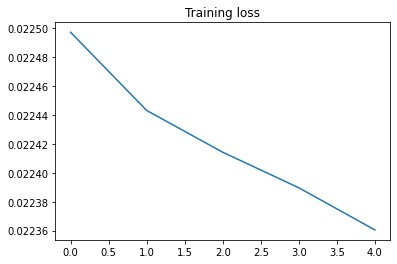

In [ ]:
import matplotlib.pyplot as plt
plt.plot(tl_p)
plt.title("Training loss")
plt.show()

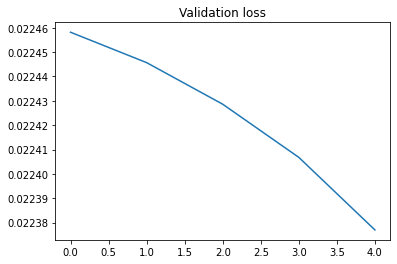

In [ ]:
import matplotlib.pyplot as plt
plt.plot(vl_p)
plt.title("Validation loss")
plt.show()

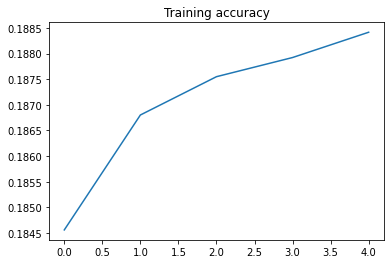

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ta_p)
plt.title("Training accuracy")
plt.show()

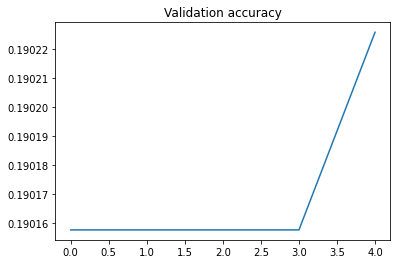

In [ ]:
import matplotlib.pyplot as plt
plt.plot(va_p)
plt.title("Validation accuracy")
plt.show()

In [ ]:
print('Training Done')
PATH = "/content/drive/MyDrive/cv2023/q1cnn2.pth"
torch.save(model.state_dict(), PATH)

Training Done


In [ ]:
model = Net()
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
outputs = model(features3)

In [ ]:
y = features3.cpu().detach().numpy()


In [ ]:
columns=["id", "image", "prediction", "truth","confidence"]
with wandb.init(project="cva1q1", config=config):
        config = wandb.config
        val_table = wandb.Table(columns=columns)

In [ ]:
def log_validation_predictions(images, labels, scores, predicted, val_table, log_counter):
  log_scores = scores.cpu().numpy()
  log_images = images.cpu().numpy()
  log_labels = labels.cpu().numpy()
  log_preds = predicted.cpu().numpy()
  # adding ids based on the order of the images
  _id = 0
  for i, l, p, s in zip(log_images, log_labels, log_preds, log_scores):
    # add required info to data table:
    # id, image pixels, model's guess, true label, scores for all classes
    img_id = str(_id) + "_" + str(log_counter)
    i = i.transpose((1,2,0))
    # print(img_id)
    # print(wandb.Image(i))
    # print(p)
    # print(l)
    arr = s
    # print(arr)
    # print(np.mean(arr))
    val_table.add_data(img_id, wandb.Image(i), p, l, np.mean(arr))
    _id += 1
    if _id == 32:
      break

In [ ]:
correct = 0
total = 0
labels_arr=[]
predictions_arr=[]
from sklearn.metrics import confusion_matrix
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    log_counter = 0
    NUM_BATCHES_TO_LOG = 100
    NUM_IMAGES_PER_BATCH = 32
    for data in test_dl:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        labels_arr.append(labels.to("cpu").numpy())
        predictions_arr.append(predicted.to("cpu").numpy())
        if log_counter < total:
          log_validation_predictions(images, labels, outputs, predicted, val_table, log_counter)
          log_counter += 1
        # cm = confusion_matrix(labels, predicted)
        # with wandb.init(project="cva1q1", config=config):
        #     config = wandb.config
        #     wandb.log({'confusion_matrix': wandb.Image(cm, caption='Confusion Matrix')})
    print("classification_report for test set:",classification_report(np.concatenate(labels_arr),np.concatenate(predictions_arr)))
    print("Accuracy of the network on the number of test images={}  is ={}".format(total,correct/total))
    # with wandb.init(project="cva1q1", config=config):
    #         config = wandb.config
    #         wandb.log({"Test_predictions" : val_table})

classification_report for test set:               precision    recall  f1-score   support

           0       0.19      0.99      0.32      1380
           1       0.25      0.02      0.03      1031
           2       0.00      0.00      0.00       868
           3       0.00      0.00      0.00       712
           4       0.00      0.00      0.00       723
           5       0.00      0.00      0.00       574
           6       0.00      0.00      0.00       553
           7       0.00      0.00      0.00       520
           8       0.00      0.00      0.00       470
           9       0.00      0.00      0.00       494

    accuracy                           0.19      7325
   macro avg       0.04      0.10      0.03      7325
weighted avg       0.07      0.19      0.06      7325

Accuracy of the network on the number of test images=7325  is =0.1886689419795222


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(len(labels_arr[0].shape))
print(len(predictions_arr[0]))

1
100


In [ ]:
lab = []

for i in range(74):
  for j in range(len(list(labels_arr[i]))):
    lab.append(labels_arr[i][j])

In [ ]:
labels_arr = np.array(labels_arr)
labels_arr = labels_arr.flat()

<ipython-input-182-26938ff22697>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  labels_arr = np.array(labels_arr)


TypeError: ignored

In [ ]:
labels_arr = sum(labels_arr, [])
predictions_arr = sum(predictions_arr, [])

ValueError: ignored

In [ ]:
cm = confusion_matrix(labels_arr, predictions_arr)
with wandb.init(project="cva1q1", config=config):
    config = wandb.config
    wandb.log({'confusion_matrix': wandb.Image(cm, caption='Confusion Matrix')})

ValueError: ignored

In [ ]:
#1.3

In [ ]:
from torchvision.models import resnet18

In [ ]:
from torch.nn import Linear, CrossEntropyLoss
from torch.optim import Adam

In [ ]:
model = resnet18(pretrained=True)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model.fc = Linear(in_features=512, out_features=10)

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,momentum=0.9)

In [ ]:
loss = CrossEntropyLoss()

In [ ]:
for epoch in range(num_epochs):
    n_total_steps = len(train_dl)
    example_ct=0;batch_ct=0;
    train_loss = 0;train_acc=0
    valid_loss=0;valid_acc=0
    labels_arr=[];outputs_arr=[]
    labels_val=[];outputs_val=[]
    train_correct = 0;
    train_total = 0;
    # model = model.cuda()
    starts = timer()
    for i, data in enumerate(train_dl,0):
        images,labels=data
        # images = images.cuda()
        # labels = labels.cuda()
        optimizer.zero_grad()
        outputs = model(images)
        ps=timer()
        starts=ps
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        train_correct += (predicted == labels).sum().item()
        train_total += len(labels)
        ps=timer()
        starts=ps
        example_ct = 0  # number of examples seen
        batch_ct = 0
        val_correct = 0
        val_total = 0;
        val_loss = 0.0
    with torch.no_grad():
        # Set to evaluation mode
        ps=timer()
        starts=ps
        # Validation loop
        model.eval()
        for jj,(data, target) in enumerate(val_dl):
            # Set to evaluation mode
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data,target
            # inputs,labels= inputs.type(torch.FloatTensor),labels.type(torch.FloatTensor)
            # if device.type == 'cuda':
            #   inputs,labels = inputs.cuda(),labels.cuda()
            outputs = model(inputs)
            ps=timer()
            starts=ps
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += len(labels)
            ps=timer()
            starts=ps
    print("final values for epoch={} train_loss={} train_acc={} valid_loss={} valid_acc={}".format(epoch,train_loss/train_total,train_correct/train_total,val_loss/val_total,val_correct/val_total))


In [ ]:
print('Training Done')
PATH = "/content/drive/MyDrive/cv2023/q1resnet.pth"
torch.save(model.state_dict(), PATH)

In [ ]:
correct = 0
total = 0
labels_arr=[]
predictions_arr=[]
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_dl:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        labels_arr.append(labels.to("cpu").numpy())
        predictions_arr.append(predicted.to("cpu").numpy())
print("classification_report for test set:",classification_report(np.concatenate(labels_arr),np.concatenate(predictions_arr)))

print("Accuracy of the network on the number of test images={}  is ={}".format(total,correct/total))

In [ ]:
Training:
from sklearn.manifold import TSNE

# 2-D t-SNE plot of the feature vectors of the validation set
tsne = TSNE(n_components=2)
tsne_result_train_2D = tsne.fit_transform(np.array(train_features))

In [ ]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit(x_train)
X_embedded.shape